In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data_set = pd.read_csv('./dataset/house_dataset.csv')
print ("Rows num: ", data_set.size, "\n")

area = data_set.loc[0:]['Area']
price = data_set.loc[0:]['Price']

Rows num:  1432 



In [5]:
# TODO
# Solve equation Ax = b
A = np.array(area)
A = A.reshape(len(A), 1)
b = np.array(price)
b = b.reshape(len(b), 1)

# Add column 1 as first column
shape = A.shape[0]
first_column = np.ones((shape, 1))
A = np.hstack((first_column, A))

# Create A^(T)
transpose = A.transpose()

# Convert Ax = b to A^(T)Ax = A^(T)b  --->  Cx = d
C = np.dot(transpose, A)
d = np.dot(transpose, b)

# Solve equation x = C^(-1)d
C_inverse = np.linalg.inv(C)
x = np.dot(C_inverse, d)


In [6]:
w = x[0]
b = x[1]
print("w: ", w, " and b: ", b)

w:  [5344.95458409]  and b:  [99.4607109]


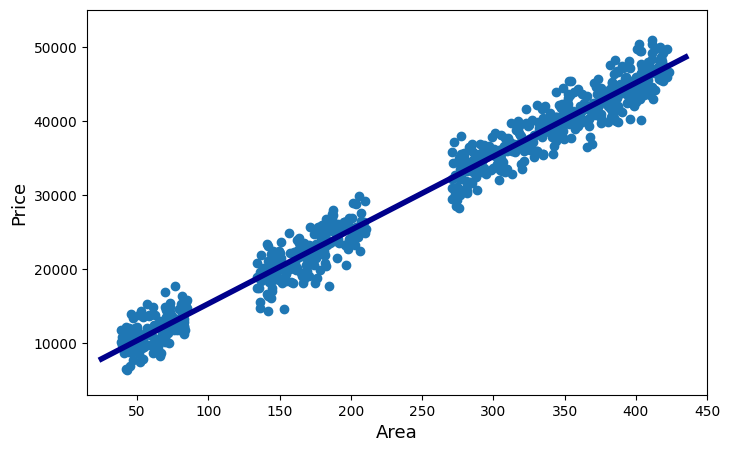

In [8]:
fig = plt.figure(figsize = (8, 5))
plt.xlim(15, 450)
plt.ylim(3000, 55000)
plt.xlabel('Area', fontsize = 13)
plt.ylabel('Price', fontsize = 13)
plt.scatter(area, price)
xprim = np.arange(25, 435, 0.01)
plt.plot(xprim, b * xprim + w, c='darkblue', linewidth = 4)
plt.show()

In [12]:
total = 0
for i in range(len(area)):
    predicted = b * area[i] + w
    total += (price[i] - predicted) ** 2
mse = total / len(area)
print("MSE: ", mse)

MSE:  [3890739.35363151]


In [14]:
def predict(x) :
    return b * x + w

In [15]:
print(predict(70))  # Correct Answer = 12307.204346925195
print(predict(110)) # Correct Answer = 16285.632782830866
print(predict(190)) # Correct Answer = 24242.489654642202
print(predict(260)) # Correct Answer = 31204.739417477125
print(predict(300)) # Correct Answer = 35183.167853382794
print(predict(370)) # Correct Answer = 42145.41761621772

[12307.20434693]
[16285.63278283]
[24242.48965464]
[31204.73941748]
[35183.16785338]
[42145.41761622]
